# Student: Arora, Sanjana (V00966221)
Question 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# loading the MNIST dataset
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# data preprocessing
train_X = train_X.reshape(train_X.shape[0], 28*28)
test_X = test_X.reshape(test_X.shape[0], 28*28)

In [ ]:
train_X = train_X / 255
test_X = test_X / 255

# Selecting images corresponding to 1 and 7

In [ ]:
train_filter = np.where((train_y == 1 ) | (train_y == 7))
test_filter = np.where((test_y == 1) | (test_y == 7))
train_X, train_y = train_X[train_filter], train_y[train_filter]
test_X, test_y = test_X[test_filter], test_y[test_filter]

# 2.1 Hard Margin SVM

In [ ]:
model_hard=SVC(kernel= 'linear', C=10**10)

In [ ]:
model_hard.fit(train_X,train_y)

SVC(C=10000000000, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = model_hard.predict(test_X)

In [ ]:
y_pred_train = model_hard.predict(train_X)

In [ ]:
#testing accuracy score
accuracy_score(test_y, y_pred)

0.9916782246879334

In [ ]:
#training accuracy score
accuracy_score(train_y, y_pred_train)

1.0

As indicated by the training and testing scores for the hard margin SVM above, the hard margin SVM performs really well in classifying the MNIST dataset. 

# 2.2 Soft Margin SVM
Tested the performance of the SVM using different values of C and based on the accuracy score of each of the C parameters, the C with value 0.1 is performing the best

In [ ]:
from sklearn.model_selection import cross_val_score
c = [0.1, 0.25, 0.5,1,2]
for i in c:   
  model_soft=SVC(kernel= 'linear',C=i)
  model_soft.fit(train_X,train_y)
  accuracies = cross_val_score(estimator = model_soft, X = train_X, y = train_y, cv = 5)
  print("\nThe accuracy with C:{:.2f}:".format(i), accuracies.mean())


The accuracy with C:0.10: 0.9958482532438154

The accuracy with C:0.25: 0.9956176318397022

The accuracy with C:0.50: 0.9954638152830121

The accuracy with C:1.00: 0.99531011693309

The accuracy with C:2.00: 0.9946951166715575


In [ ]:
from sklearn.model_selection import cross_val_score
c = [25,30,35]
for i in c:   
  model_soft=SVC(kernel= 'linear',C=i)
  model_soft.fit(train_X,train_y)
  accuracies = cross_val_score(estimator = model_soft, X = train_X, y = train_y, cv = 5)
  print("\nThe accuracy with C:{}:".format(i), accuracies.mean())



The accuracy with C:25: 0.9943107082624463

The accuracy with C:30: 0.9943107082624463

The accuracy with C:35: 0.9943107082624463


Implementing the soft margin SVM using the selected hyperparameters

In [ ]:
model_soft = SVC(kernel= 'linear',C=0.1)
model_soft.fit(train_X,train_y)
y_pred_test = model_soft.predict(test_X)
y_pred_train = model_soft.predict(train_X)

In [ ]:
#training accuracy score
accuracy_score(train_y, y_pred_train)

0.9977704313062197

In [ ]:
#testing accuracy score
accuracy_score(test_y, y_pred_test)

0.9944521497919556

**Observation**: The training accuracy achieved with hard margin SVM (1) is higher than the soft margin accuracy .9977704313062197. While the testing accuracy has improved slightly for soft margin SVM .9944 as compared to the .9915 achieved using hard margin SVM.

I believe overall classification performance of soft margin SVM is slightly better than the hard margin SVM in this case.In general, the soft margin classifiers are better than the hard margin SVMs as the hard margin SVMS are not able to generalize the data and are sensitive to outliers.

# 2.3 a) Polynomial kernel SVM

In [ ]:
degree = [1,3,4]
for d in degree:
  clf = SVC(kernel='poly', degree=d, C=0.1)
  clf.fit(train_X,train_y)
  print("\nThe testing accuracy with degree:{}:".format(d), clf.score(train_X,train_y))
  print("\nThe training accuracy with degree:{}:".format(d), clf.score(test_X, test_y))


The testing accuracy with degree:1: 0.9938494656723302

The training accuracy with degree:1: 0.989828941285252

The testing accuracy with degree:3: 0.9931575305604674

The training accuracy with degree:3: 0.9893666204345816

The testing accuracy with degree:4: 0.9896978550011533

The training accuracy with degree:4: 0.9833564493758669


Based on the training and testing scores above, it is indicated that the polynomial kernel with degree 1 is having the highest training and testing accuracy.

# 2.3 b) Gaussian Kernel

In [ ]:
from sklearn.svm import SVC
gamma = [0.001, 0.01,1]
for g in gamma:
  model_gamma = SVC(kernel='rbf', gamma=g, C=0.1)
  model_gamma.fit(train_X,train_y)
  print("\nThe testing accuracy with gamma:{}:".format(g), model_gamma.score(train_X,train_y))
  print("\nThe training accuracy with gamma:{}:".format(g), model_gamma.score(test_X,test_y))


The testing accuracy with gamma:0.001: 0.9864688244791266

The training accuracy with gamma:0.001: 0.9805825242718447

The testing accuracy with gamma:0.01: 0.9943876374260013

The training accuracy with gamma:0.01: 0.9907535829865927

The testing accuracy with gamma:1: 0.5183362804643653

The training accuracy with gamma:1: 0.5247341655108645


The gaussian kernel with gamma 0.01 is having the highest training and testing accuracy scores. 

# 2.3 c) Linear kernel

In [ ]:
model=SVC(kernel= 'linear', C = 0.1)
model.fit(train_X,train_y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(test_X)
#test accuracy score
accuracy_score(test_y, y_pred)

0.9944521497919556

In [ ]:
#train accuracy score
y_pred_train = model.predict(train_X)
accuracy_score(train_y, y_pred_train)

0.9977704313062197

Based on the comparison between the best polynomial kernel, gaussian kernel and linear kernel soft margin classifiers, the linear classifier is performing the best with 99.4% testing accuracy and 99.77% training accuracy.

# 2.4 AVA

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
unique_label = np.unique(train_y)


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
unique_label

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# data preprocessing
train_X = train_X.reshape(train_X.shape[0], 28*28)
test_X = test_X.reshape(test_X.shape[0], 28*28)
train_X = train_X / 255
test_X = test_X / 255

In [ ]:
# creating a second class list
second_class_list = unique_label

In [ ]:
# data from to store the accuracy scores corresponding to the classes being considered by the classifier model
df = pd.DataFrame(columns=['Class_1','Class_2','Training_Accuracy_Score','Test_Accuracy_Score'])

In [ ]:
for first_class in unique_label:
  first_class_list=np.array([first_class])
  # subtracting the class being considered from the second class list
     # this is done to ensure that two classes being considered are not same
  second_class_list = np.setdiff1d(second_class_list,first_class_list)
  for second_class in second_class_list:
      train_filter = np.where((train_y==second_class) | (train_y == first_class ))[0]
      test_filter = np.where((test_y ==second_class) | (test_y == first_class ))[0]
      train_XX, train_yy = train_X[train_filter], train_y[train_filter]
      test_XX, test_yy = test_X[test_filter], test_y[test_filter]
      clf_AVA = SVC(kernel='linear', C =0.1)
      clf_AVA.fit(train_XX, train_yy)
      train_score = clf_AVA.score(train_XX, train_yy)
      test_score  = clf_AVA.score(test_XX, test_yy) 
      df = df.append({'Class_1': first_class, 'Class_2': second_class, 'Training_Accuracy_Score':train_score, 'Test_Accuracy_Score':test_score}, ignore_index=True)


In [ ]:
df[['Class_1','Class_2','Training_Accuracy_Score','Test_Accuracy_Score']].head(45)

,Class_1,Class_2,Training_Accuracy_Score,Test_Accuracy_Score
0,0.0,1.0,0.999842,0.999054
1,0.0,2.0,0.995371,0.992048
2,0.0,3.0,0.997428,0.997487
3,0.0,4.0,0.998300,0.998471
4,0.0,5.0,0.991714,0.990919
5,0.0,6.0,0.995524,0.990196
6,0.0,7.0,0.999344,0.996016
7,0.0,8.0,0.996433,0.992323
8,0.0,9.0,0.997726,0.993464
9,1.0,2.0,0.995669,0.994462


Heatmap showing the training accuracy scores of the 45 classifiers

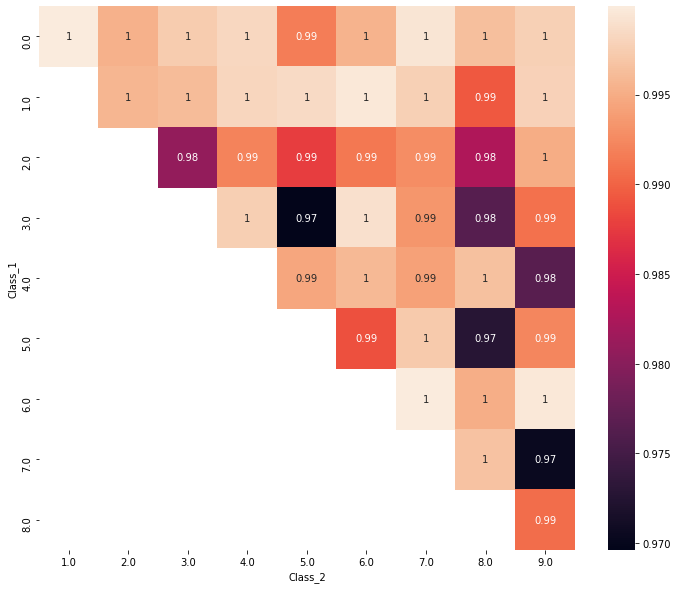

In [ ]:
training_subset = df.pivot("Class_1","Class_2","Training_Accuracy_Score")
plt.figure(figsize=(12, 10))
sns.heatmap(training_subset, ax = plt.axes(), annot=True)
ax.set_title('Heatmap of Training Accuracy Score of the 45 classifiers')
plt.show()

Heatmap showing the testing accuracy scores of the 45 classifiers

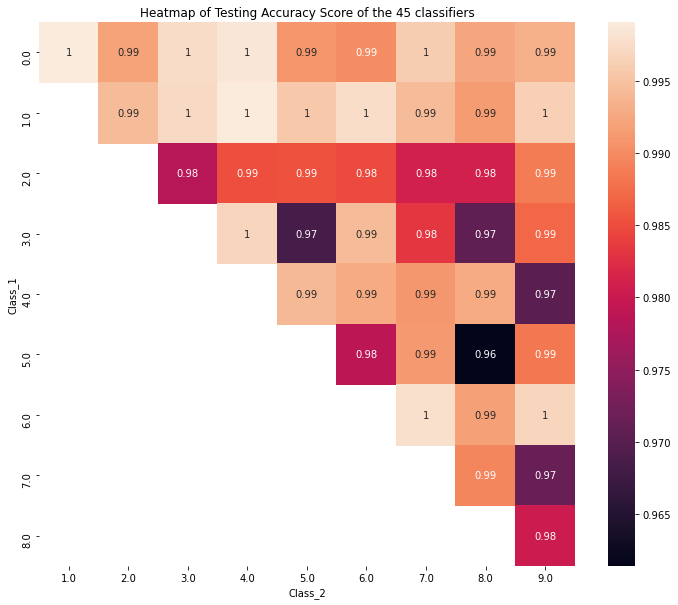

In [ ]:
testing_subset = df.pivot("Class_1","Class_2","Test_Accuracy_Score")
plt.figure(figsize=(12, 10))
ax = plt.axes()
sns.heatmap(testing_subset, ax = ax, annot=True)
ax.set_title('Heatmap of Testing Accuracy Score of the 45 classifiers')
plt.show()